## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Data Load

### Training Data Load

In [ ]:
train_df = pd.read_csv("UNSW_NB15_training-set.csv")
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


### Testing Data Load

In [ ]:
test_df = pd.read_csv("UNSW_NB15_testing-set.csv")
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  int16  
 2   service            82332 non-null  int8   
 3   state              82332 non-null  int8   
 4   spkts              82332 non-null  float64
 5   dpkts              82332 non-null  float64
 6   sbytes             82332 non-null  float64
 7   dbytes             82332 non-null  float64
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  float64
 10  dttl               82332 non-null  float64
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  float64
 14  dloss              82332 non-null  float64
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int16  
 2   service            175341 non-null  int8   
 3   state              175341 non-null  int8   
 4   spkts              175341 non-null  float64
 5   dpkts              175341 non-null  float64
 6   sbytes             175341 non-null  float64
 7   dbytes             175341 non-null  float64
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  float64
 10  dttl               175341 non-null  float64
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  float64
 14  dloss              175341 non-null  float64
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
train_df.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.677927e-02,109.348273,1.421695,3.374751,0.001660,0.001592,0.000555,0.000903,0.082411,0.709677,...,0.067740,0.071973,0.104135,0.004142,0.004190,0.008109,0.092684,0.133840,0.011126,0.550600
std,7.850742e-02,18.637282,2.108083,0.670372,0.012580,0.010490,0.011956,0.010334,0.148620,0.398092,...,0.144647,0.159875,0.184116,0.045586,0.046243,0.039918,0.144812,0.182318,0.104891,0.497436
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.333334e-07,111.000000,0.000000,3.000000,0.000094,0.000000,0.000006,0.000000,0.000029,0.243137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000
50%,2.356334e-04,111.000000,0.000000,3.000000,0.000470,0.000182,0.000036,0.000012,0.002650,0.996078,...,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.033898,0.065574,0.000000,1.000000
75%,1.198934e-02,117.000000,2.000000,4.000000,0.001033,0.000908,0.000087,0.000065,0.111111,0.996078,...,0.051724,0.054054,0.080645,0.000000,0.000000,0.000000,0.101695,0.163934,0.000000,1.000000
max,1.000000e+00,130.000000,12.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,2.265648e-02,107.726516,1.618920,3.418008,0.001813,0.001722,6.144467e-04,0.001019,0.095406,0.704106,...,0.075578,0.086656,0.124675,0.007474,0.007474,0.008317,0.100946,0.132799,0.015752,0.680622
std,1.080042e-01,21.949061,2.305151,0.648504,0.012859,0.010007,1.217391e-02,0.009801,0.165401,0.403686,...,0.138743,0.156313,0.176713,0.063024,0.063024,0.043825,0.141042,0.176343,0.124516,0.466237
min,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000,0.000000,2.786340e-07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.333334e-07,111.000000,0.000000,3.000000,0.000094,0.000000,6.269265e-06,0.000000,0.000033,0.243137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016949,0.016393,0.000000,0.000000
50%,2.636667e-05,111.000000,0.000000,3.000000,0.000094,0.000182,2.828135e-05,0.000011,0.003226,0.996078,...,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.033898,0.049180,0.000000,1.000000
75%,1.113449e-02,117.000000,2.000000,4.000000,0.001033,0.000908,9.710395e-05,0.000075,0.125000,0.996078,...,0.068966,0.054054,0.177419,0.000000,0.000000,0.000000,0.135593,0.180328,0.000000,1.000000
max,1.000000e+00,130.000000,12.000000,6.000000,0.903241,0.996007,9.031370e-01,0.999865,1.000000,1.000000,...,0.862069,1.216216,1.032258,2.000000,2.000000,1.875000,1.000000,1.000000,1.000000,1.000000


## Preprocessing

In [ ]:
train_df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
test_df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [ ]:
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)

In [ ]:
categorical_features = ['proto', 'service', 'state']
label_encoders = {}

In [ ]:
for feature in categorical_features:
    train_df[feature] = train_df[feature].astype('category')
    test_df[feature] = test_df[feature].astype('category')

    test_df[feature] = test_df[feature].cat.set_categories(train_df[feature].cat.categories)

    train_df[feature] = train_df[feature].cat.codes
    test_df[feature] = test_df[feature].cat.codes

In [ ]:
for col in train_df.columns:
    if train_df[col].dtype == "object":
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)
        test_df[col].fillna(test_df[col].median(), inplace=True)

In [ ]:
scaler = MinMaxScaler()
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

## EDA

In [ ]:
sns.set(style="whitegrid")

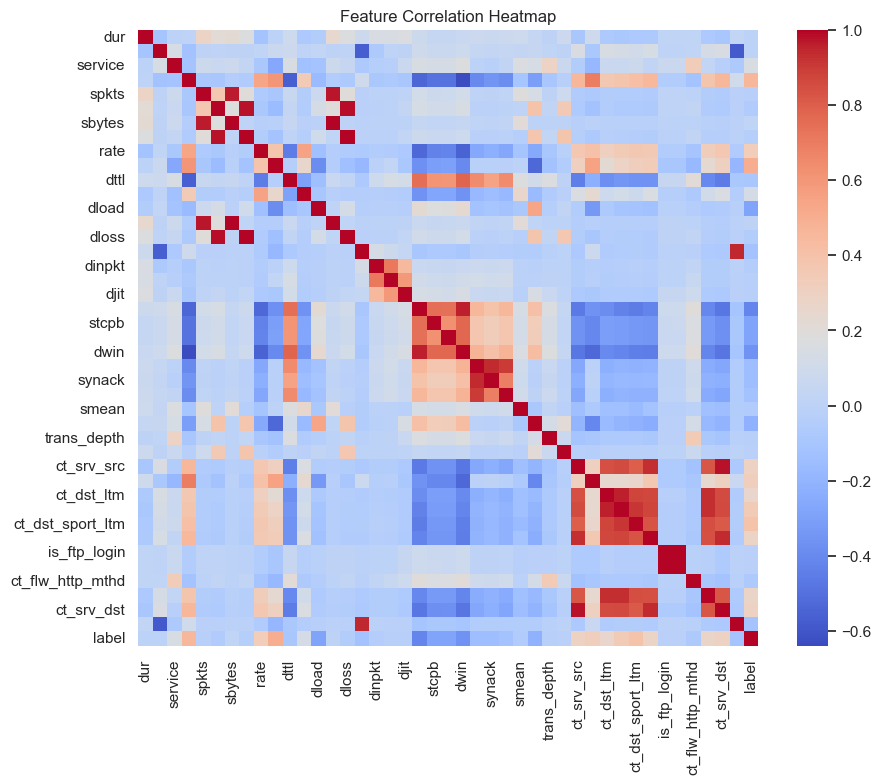

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

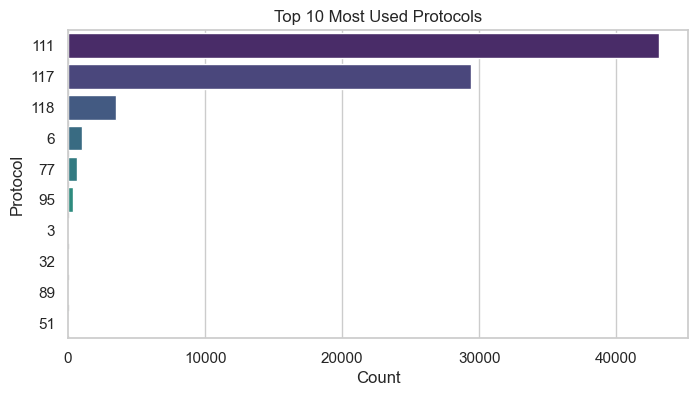

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y=train_df["proto"], order=train_df["proto"].value_counts().index[:10], palette="viridis")
plt.title("Top 10 Most Used Protocols")
plt.xlabel("Count")
plt.ylabel("Protocol")
plt.show()

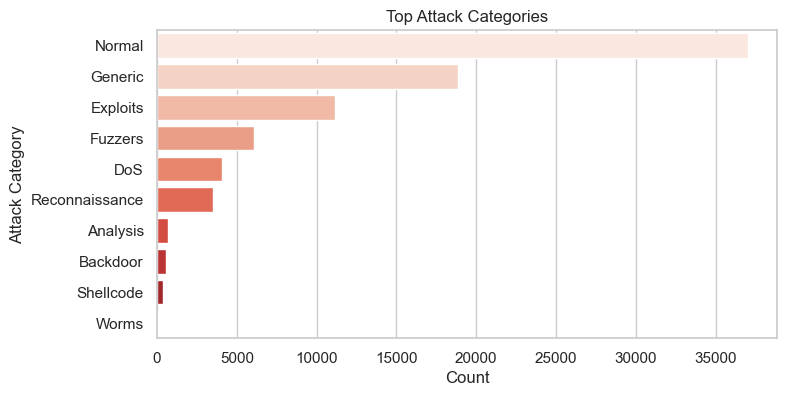

In [ ]:
if "attack_cat" in train_df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=train_df["attack_cat"], order=train_df["attack_cat"].value_counts().index, palette="Reds")
    plt.title("Top Attack Categories")
    plt.xlabel("Count")
    plt.ylabel("Attack Category")
    plt.show()

## Train-Test Split

In [ ]:
X_train = train_df.drop(columns=['attack_cat', 'label'])
y_train = train_df['label']
X_test = test_df.drop(columns=['attack_cat', 'label'])
y_test = test_df['label']

## Decision Tree Model

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
y_dt_prob = dt_model.predict_proba(X_test)[:, 1]

In [ ]:
dt_accuracy = accuracy_score(y_test, y_dt_pred)
dt_precision = precision_score(y_test, y_dt_pred)
dt_recall = recall_score(y_test, y_dt_pred)
dt_f1 = f1_score(y_test, y_dt_pred)
dt_auc = roc_auc_score(y_test, y_dt_prob)

In [ ]:
print(f"Decision Tree - Accuracy: {dt_accuracy:.4f}, Precision: {dt_precision:.4f}, Recall: {dt_recall:.4f}, F1 Score: {dt_f1:.4f}, AUC-ROC: {dt_auc:.4f}")

Decision Tree - Accuracy: 0.8954, Precision: 0.9811, Recall: 0.8630, F1 Score: 0.9183, AUC-ROC: 0.9138


In [ ]:
print("\nDecision Tree - Classification Report")
print(classification_report(y_test, y_dt_pred))


Decision Tree - Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85     56000
         1.0       0.98      0.86      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.87      0.91      0.89    175341
weighted avg       0.91      0.90      0.90    175341



In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

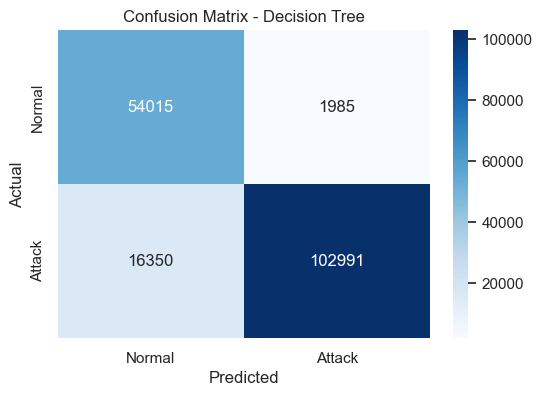

In [ ]:
plot_confusion_matrix(y_test, y_dt_pred, "Decision Tree")

## Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
y_rf_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)
rf_auc = roc_auc_score(y_test, y_rf_prob)

In [ ]:
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}, AUC-ROC: {rf_auc:.4f}")

Random Forest - Accuracy: 0.9008, Precision: 0.9878, Recall: 0.8649, F1 Score: 0.9223, AUC-ROC: 0.9850


In [ ]:
print("\nRandom Forest - Classification Report")
print(classification_report(y_test, y_rf_pred))


Random Forest - Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86     56000
         1.0       0.99      0.86      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



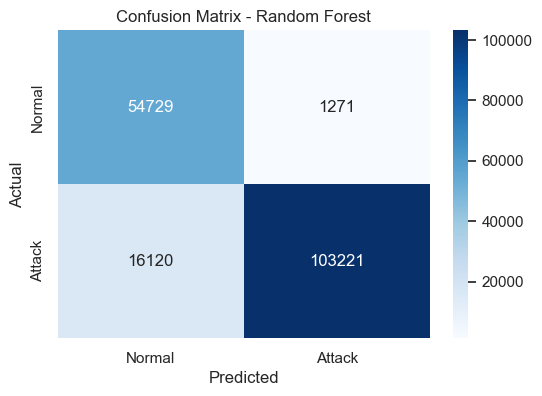

In [ ]:
plot_confusion_matrix(y_test, y_rf_pred, "Random Forest")

## Support Vector Machine Model

In [ ]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_test)
y_svm_prob = svm_model.predict_proba(X_test)[:, 1]

In [ ]:
svm_accuracy = accuracy_score(y_test, y_svm_pred)
svm_precision = precision_score(y_test, y_svm_pred)
svm_recall = recall_score(y_test, y_svm_pred)
svm_f1 = f1_score(y_test, y_svm_pred)
svm_auc = roc_auc_score(y_test, y_svm_prob)

In [ ]:
print(f"SVM - Accuracy: {svm_accuracy:.4f}, Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1 Score: {svm_f1:.4f}, AUC-ROC: {svm_auc:.4f}")

SVM - Accuracy: 0.7946, Precision: 0.9239, Recall: 0.7609, F1 Score: 0.8345, AUC-ROC: 0.9259


In [ ]:
print("\nSVM - Classification Report")
print(classification_report(y_test, y_svm_pred))


SVM - Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.87      0.73     56000
         1.0       0.92      0.76      0.83    119341

    accuracy                           0.79    175341
   macro avg       0.78      0.81      0.78    175341
weighted avg       0.83      0.79      0.80    175341



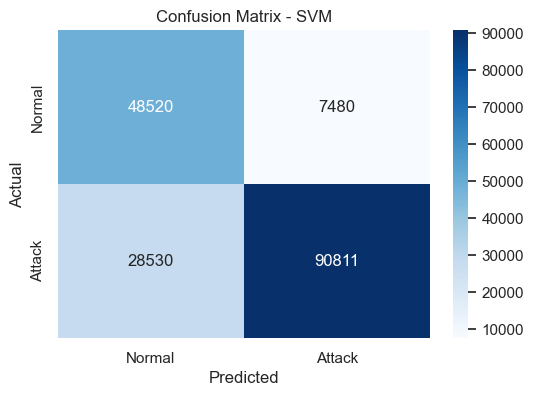

In [ ]:
plot_confusion_matrix(y_test, y_svm_pred, "SVM")

## Neural Network Model

In [ ]:
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7073 - loss: 0.6942 - val_accuracy: 0.9144 - val_loss: 0.2404
Epoch 2/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8466 - loss: 0.2860 - val_accuracy: 0.8716 - val_loss: 0.2468
Epoch 3/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8691 - loss: 0.2571 - val_accuracy: 0.8968 - val_loss: 0.2557
Epoch 4/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8810 - loss: 0.2376 - val_accuracy: 0.8742 - val_loss: 0.2885
Epoch 5/5
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8900 - loss: 0.2277 - val_accuracy: 0.8939 - val_loss: 0.2536


In [ ]:
y_nn_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
y_nn_prob = nn_model.predict(X_test)

5480/5480 ━━━━━━━━━━━━━━━━━━━━ 5s 971us/step
5480/5480 ━━━━━━━━━━━━━━━━━━━━ 5s 919us/step


In [ ]:
nn_accuracy = accuracy_score(y_test, y_nn_pred)
nn_precision = precision_score(y_test, y_nn_pred)
nn_recall = recall_score(y_test, y_nn_pred)
nn_f1 = f1_score(y_test, y_nn_pred)
nn_auc = roc_auc_score(y_test, y_nn_prob)

In [ ]:
print(f"Neural Network - Accuracy: {nn_accuracy:.4f}, Precision: {nn_precision:.4f}, Recall: {nn_recall:.4f}, F1 Score: {nn_f1:.4f}, AUC-ROC: {nn_auc:.4f}")

Neural Network - Accuracy: 0.8939, Precision: 0.9719, Recall: 0.8693, F1 Score: 0.9178, AUC-ROC: 0.9767


In [ ]:
print("\nNeural Network - Classification Report")
print(classification_report(y_test, y_nn_pred))


Neural Network - Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85     56000
         1.0       0.97      0.87      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.88    175341
weighted avg       0.91      0.89      0.90    175341



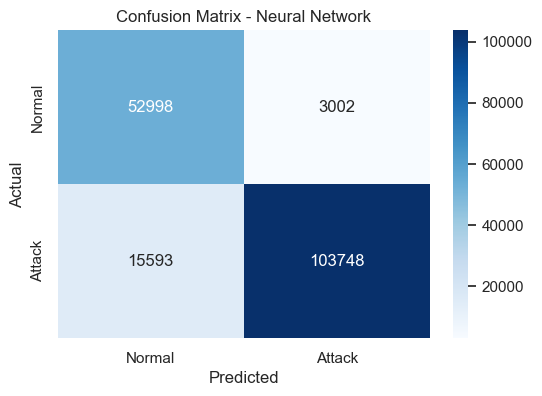

In [ ]:
plot_confusion_matrix(y_test, y_nn_pred, "Neural Network")

## Model Comparison Dataframe

In [ ]:
models = ["Decision Tree", "Random Forest", "SVM", "Neural Network"]
accuracy_scores = [dt_accuracy, rf_accuracy, svm_accuracy, nn_accuracy]
precision_scores = [dt_precision, rf_precision, svm_precision, nn_precision]
recall_scores = [dt_recall, rf_recall, svm_recall, nn_recall]
f1_scores = [dt_f1, rf_f1, svm_f1, nn_f1]
auc_scores = [dt_auc, rf_auc, svm_auc, nn_auc]

In [ ]:
metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "AUC-ROC": auc_scores
})
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Decision Tree,0.895432,0.981091,0.862998,0.918263,0.913810
1,Random Forest,0.900816,0.987836,0.864925,0.922304,0.984968
2,SVM,0.794629,0.923899,0.760937,0.834537,0.925870
3,Neural Network,0.893950,0.971878,0.869341,0.917754,0.976655


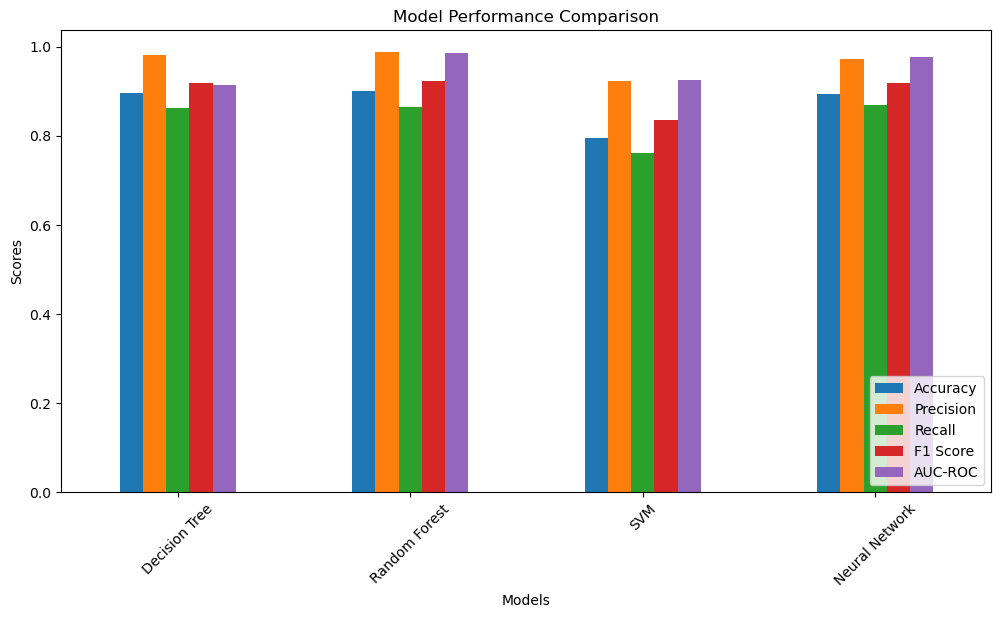

In [ ]:
metrics_df.set_index("Model", inplace=True)
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()